In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Sanja\OneDrive\Desktop\Hacathon 2"

C:\Users\Sanja\OneDrive\Desktop\Hacathon 2


In [3]:
train=pd.read_csv("employee_train.csv")
test=pd.read_csv("employee_test.csv")

### Data Cleaning

In [4]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

In [5]:
# temporarily add dependent variable to test data

test['treatment']='test'

In [6]:
# concat both the dataframes for perprocessing

combinedf=pd.concat([train,test],axis=0)

In [7]:
combinedf.shape

(1258, 28)

In [8]:
combinedf.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [9]:
combinedf=combinedf.drop(['S.No','Timestamp','comments'],axis=1)

In [10]:
combinedf.isnull().sum().sort_values(ascending=False)

state                        515
work_interfere               264
self_employed                 18
benefits                      16
leave                          9
wellness_program               6
Age                            0
anonymity                      0
mental_vs_physical             0
phys_health_interview          0
mental_health_interview        0
supervisor                     0
coworkers                      0
phys_health_consequence        0
mental_health_consequence      0
care_options                   0
seek_help                      0
Gender                         0
tech_company                   0
remote_work                    0
no_employees                   0
treatment                      0
family_history                 0
Country                        0
obs_consequence                0
dtype: int64

In [11]:
combinedf.Age.value_counts(dropna=False)

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 42             20
 41             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

In [12]:
combinedf.state.value_counts(dropna=False)

NaN    515
CA     138
WA      70
NY      57
TN      45
TX      44
OH      30
OR      29
PA      29
IL      28
IN      27
MI      22
MN      21
MA      20
FL      15
NC      14
VA      14
WI      12
GA      12
MO      12
UT      11
CO       9
MD       8
AL       8
AZ       7
OK       6
NJ       6
KY       5
SC       5
IA       4
CT       4
DC       4
NV       3
VT       3
SD       3
KS       3
NH       3
WY       2
NM       2
NE       2
WV       1
ID       1
MS       1
RI       1
LA       1
ME       1
Name: state, dtype: int64

In [13]:
combinedf.state=combinedf.state.fillna('Missing')

In [14]:
combinedf.work_interfere.value_counts(dropna=False)

Sometimes    465
NaN          264
Never        213
Rarely       173
Often        143
Name: work_interfere, dtype: int64

In [15]:
combinedf.work_interfere=combinedf.work_interfere.fillna("Sometimes")

In [16]:
combinedf.self_employed.value_counts(dropna=False)

No     1095
Yes     145
NaN      18
Name: self_employed, dtype: int64

In [17]:
combinedf.benefits.value_counts(dropna=False)

Yes           477
Don't know    392
No            373
NaN            16
Name: benefits, dtype: int64

In [18]:
combinedf.leave.value_counts(dropna=False)

Don't know            554
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         97
NaN                     9
Name: leave, dtype: int64

In [19]:
combinedf.wellness_program.value_counts(dropna=False)

No            842
Yes           228
Don't know    182
NaN             6
Name: wellness_program, dtype: int64

In [20]:
 for col in combinedf.columns:
        combinedf[col]=combinedf[col].fillna(combinedf[col].value_counts().idxmax())

In [21]:
combinedf.Gender=combinedf.Gender.replace(['male','m','M','Make','Cis Male','Male',
                                        'msle','male leaning androgynous','cis male',
                                        'Mail','Malr','A little about you','Cis Man',
                                        'Guy (-ish) ^_^','something kinda male?',
                                        'Male-ish','maile','Mal',
                                        'Male (CIS)','Man',
                                        'ostensibly male, unsure what that really means'],'Male')

In [22]:
combinedf.Gender=combinedf.Gender.replace(['f','F','Female','female','Female (trans)',
                                           'Female (cis)','cis-female/femme', 'femail','woman',
                                           'Femake','Mail','queer/she/they',
                                           'Cis Female','Cis Man','Woman','Trans woman',
                                        'Guy (-ish) ^_^','Trans-female'],'Female')

In [23]:
combinedf.Gender=combinedf.Gender.replace(['queer','p','Neuter','Agender','Androgyne',
                                          'Genderqueer','fluid','Enby',
                                           'non-binary','Nah','All'],'Transgender')

In [24]:
combinedf.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [25]:
# Split combined into objcols and numcols for Transformation

objcols=combinedf[['Gender', 'Country', 'state', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']]

numcols=combinedf[['Age','treatment']]

In [26]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [27]:
objcols_encode=pd.get_dummies(objcols)

In [28]:
objcols_encode['treatment']=numcols.treatment

In [29]:
numcols=numcols.drop('treatment',axis=1)

In [30]:
numcols_scaled=StandardScaler().fit_transform(numcols)

In [31]:
# convert back to DataFrame

numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [32]:
numcols_scaled.head()

,Age
0,-0.028205
1,-0.028205
2,-0.028205
3,-0.028205
4,-0.028205


In [33]:
objcols_encode=objcols_encode.reset_index()

In [34]:
numcols_scaled=numcols_scaled.reset_index()

In [35]:
objcols_encode.head()

,index,Gender_Female,Gender_Female,Gender_Male,Gender_Male,Gender_Transgender,Country_Australia,Country_Austria,"Country_Bahamas, The",Country_Belgium,...,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes,treatment
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,Yes
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,No
2,2,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,No
3,3,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,Yes
4,4,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,No


In [36]:
objcols_encode.treatment.value_counts()

No      536
Yes     512
test    210
Name: treatment, dtype: int64

In [37]:
clean_df=pd.concat([numcols_scaled,objcols_encode],axis=1)

In [38]:
train_df=clean_df[clean_df.treatment!='test']
test_df=clean_df[clean_df.treatment=='test']

In [39]:
test_df=test_df.drop('treatment',axis=1)

In [40]:
X=train_df.drop('treatment',axis=1)
y=train_df.treatment

In [41]:
X.head()

,index,Age,index,Gender_Female,Gender_Female,Gender_Male,Gender_Male,Gender_Transgender,Country_Australia,Country_Austria,...,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,0,-0.028205,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,1,-0.028205,1,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,2,-0.028205,2,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,3,-0.028205,3,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,4,-0.028205,4,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0


In [42]:
y=LabelEncoder().fit_transform(y)

### Logistic Regression

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,classification_report

In [44]:
logit=LogisticRegression(max_iter=3000)

In [45]:
logitmodel=logit.fit(X,y)

In [46]:
logitmodel.score(X,y)

0.7948473282442748

In [47]:
logitpredict=logitmodel.predict(X)

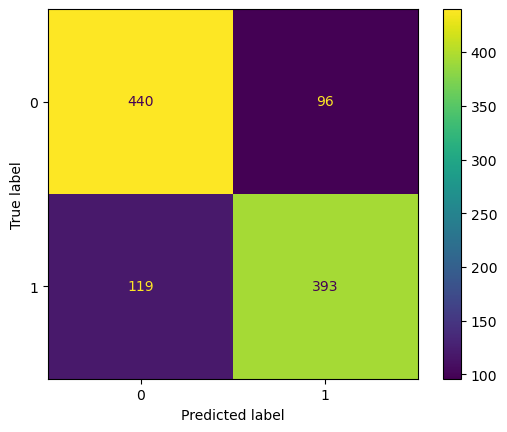

In [48]:
ConfusionMatrixDisplay.from_predictions(y,logitpredict)

In [49]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       536
           1       0.80      0.77      0.79       512

    accuracy                           0.79      1048
   macro avg       0.80      0.79      0.79      1048
weighted avg       0.80      0.79      0.79      1048



In [50]:
cross_val_score(logit,X,y)

array([0.73333333, 0.75238095, 0.77142857, 0.70334928, 0.71770335])

In [51]:
np.mean([0.73333333, 0.74285714, 0.76666667, 0.6937799 , 0.72727273])

0.732781954

In [52]:
logittestpredict=logitmodel.predict(test_df)

In [53]:
pred=pd.DataFrame(logitpredict,columns=['predicted'])

In [54]:
predicted=[]
for row in pred.predicted:
    if row==0:
        predicted.append('No')
    else:
        predicted.append('Yes')
pred['test_pred']=predicted

In [55]:
pred.head()

,predicted,test_pred
0,1,Yes
1,0,No
2,1,Yes
3,1,Yes
4,0,No


In [56]:
pred.to_csv("conditionlogit.csv")

### DecisionTree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
tree=DecisionTreeClassifier(max_depth=8)

In [59]:
treemodel=tree.fit(X,y)

In [60]:
treemodel.score(X,y)

0.8778625954198473

In [61]:
treepredict=treemodel.predict(X)

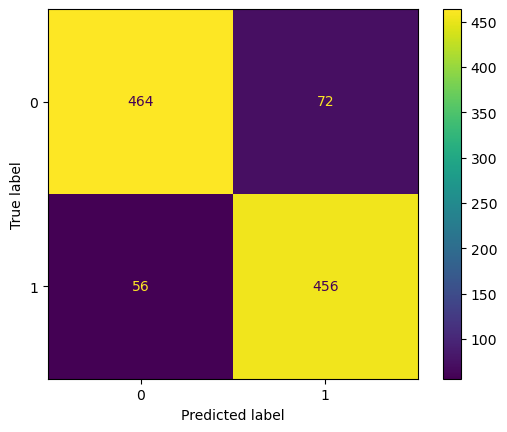

In [62]:
ConfusionMatrixDisplay.from_predictions(y,treepredict)

In [63]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       536
           1       0.86      0.89      0.88       512

    accuracy                           0.88      1048
   macro avg       0.88      0.88      0.88      1048
weighted avg       0.88      0.88      0.88      1048



In [64]:
cross_val_score(tree,X,y)

array([0.63809524, 0.75238095, 0.73809524, 0.67464115, 0.56937799])

In [65]:
np.mean([0.61428571, 0.74761905, 0.73333333, 0.67942584, 0.58851675])

0.6726361359999999

In [66]:
treetestpredict=treemodel.predict(test_df)

In [67]:
predicttree=pd.DataFrame(treetestpredict,columns=['predicted'])

In [68]:
predicted=[]
for row in predicttree.predicted:
    if row==0:
        predicted.append('No')
    else:
        predicted.append('Yes')
predicttree['test_pred']=predicted

In [69]:
predicttree.head()

,predicted,test_pred
0,1,Yes
1,1,Yes
2,1,Yes
3,1,Yes
4,0,No


In [70]:
predicttree.to_csv("conditiontree.csv")

### ENSEMBLE METHODS
    #RandomForest
    #GradientBoosting

In [71]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [72]:
RF=RandomForestClassifier(n_estimators=200)

In [73]:
RFmodel=RF.fit(X,y)

In [74]:
RFmodel.score(X,y)

1.0

In [75]:
RFpredict=RFmodel.predict(X)

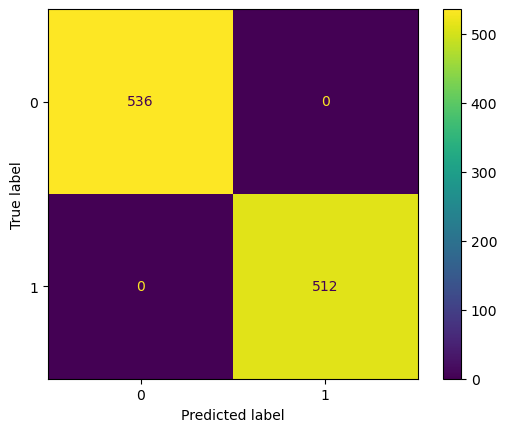

In [76]:
ConfusionMatrixDisplay.from_predictions(y,RFpredict)

In [77]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       512

    accuracy                           1.00      1048
   macro avg       1.00      1.00      1.00      1048
weighted avg       1.00      1.00      1.00      1048



In [78]:
gbm=GradientBoostingClassifier(n_estimators=200)

In [79]:
gbmmodel=gbm.fit(X,y)

In [80]:
gbmmodel.score(X,y)

0.8769083969465649

In [81]:
gbmpredict=gbmmodel.predict(X)

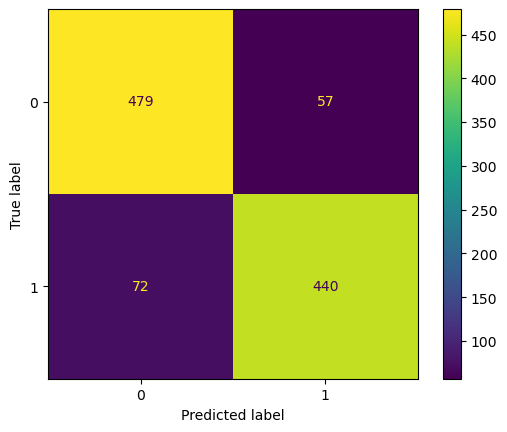

In [82]:
ConfusionMatrixDisplay.from_predictions(y,gbmpredict)

In [83]:
cross_val_score(gbm,X,y)

array([0.5047619 , 0.67619048, 0.75714286, 0.6937799 , 0.65550239])

In [84]:
np.mean([0.51428571, 0.71904762, 0.74761905, 0.70334928, 0.68899522])

0.6746593759999999

### XGBoost

In [85]:
from xgboost import XGBClassifier

In [86]:
xgb=XGBClassifier(n_estimators=100,learning_rate=0.01)

In [87]:
X=X.drop('index',axis=1)

In [88]:
xgbmodel=xgb.fit(X,y)

In [89]:
xgbmodel.score(X,y)

0.8358778625954199

In [90]:
cross_val_score(xgb,X,y)

array([0.74285714, 0.71904762, 0.73333333, 0.74162679, 0.74162679])

In [91]:
np.mean([0.74285714, 0.71904762, 0.73333333, 0.74162679, 0.74162679])

0.735698334

### Cat Boost

In [92]:
from catboost import CatBoostClassifier

In [93]:
cat=CatBoostClassifier(iterations=200, learning_rate=0.1, depth=5)

In [94]:
catmodel=cat.fit(X,y)

0:	learn: 0.6690405	total: 143ms	remaining: 28.5s
1:	learn: 0.6334792	total: 146ms	remaining: 14.4s
2:	learn: 0.6084956	total: 148ms	remaining: 9.72s
3:	learn: 0.5876806	total: 150ms	remaining: 7.36s
4:	learn: 0.5718596	total: 153ms	remaining: 5.95s
5:	learn: 0.5645327	total: 155ms	remaining: 5s
6:	learn: 0.5546703	total: 157ms	remaining: 4.33s
7:	learn: 0.5445064	total: 159ms	remaining: 3.82s
8:	learn: 0.5375398	total: 162ms	remaining: 3.43s
9:	learn: 0.5308030	total: 164ms	remaining: 3.11s
10:	learn: 0.5243255	total: 166ms	remaining: 2.85s
11:	learn: 0.5172941	total: 168ms	remaining: 2.63s
12:	learn: 0.5126251	total: 170ms	remaining: 2.45s
13:	learn: 0.5078531	total: 173ms	remaining: 2.29s
14:	learn: 0.5045676	total: 175ms	remaining: 2.15s
15:	learn: 0.4993369	total: 177ms	remaining: 2.03s
16:	learn: 0.4955349	total: 179ms	remaining: 1.92s
17:	learn: 0.4921743	total: 181ms	remaining: 1.83s
18:	learn: 0.4891346	total: 183ms	remaining: 1.74s
19:	learn: 0.4832990	total: 185ms	remaining:

In [95]:
catmodel.score(X,y)

0.9398854961832062

In [96]:
cross_val_score(cat,X,y)

0:	learn: 0.6642366	total: 2.12ms	remaining: 421ms
1:	learn: 0.6441983	total: 4.48ms	remaining: 444ms
2:	learn: 0.6200777	total: 6.66ms	remaining: 437ms
3:	learn: 0.6003840	total: 8.63ms	remaining: 423ms
4:	learn: 0.5843816	total: 10.6ms	remaining: 412ms
5:	learn: 0.5646072	total: 12.7ms	remaining: 411ms
6:	learn: 0.5489934	total: 15ms	remaining: 412ms
7:	learn: 0.5417595	total: 16.9ms	remaining: 407ms
8:	learn: 0.5331263	total: 19.2ms	remaining: 408ms
9:	learn: 0.5214514	total: 21.3ms	remaining: 404ms
10:	learn: 0.5127704	total: 23.2ms	remaining: 398ms
11:	learn: 0.5061855	total: 25ms	remaining: 392ms
12:	learn: 0.5027950	total: 26.9ms	remaining: 386ms
13:	learn: 0.4977332	total: 28.7ms	remaining: 381ms
14:	learn: 0.4920268	total: 30.6ms	remaining: 378ms
15:	learn: 0.4875999	total: 32.7ms	remaining: 376ms
16:	learn: 0.4846218	total: 34.8ms	remaining: 375ms
17:	learn: 0.4804731	total: 36.8ms	remaining: 372ms
18:	learn: 0.4779809	total: 38.8ms	remaining: 370ms
19:	learn: 0.4757478	total

array([0.72857143, 0.73809524, 0.76666667, 0.70334928, 0.72727273])

In [97]:
np.mean([0.72857143, 0.73809524, 0.76666667, 0.70334928, 0.72727273])

0.73279107